In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# Importing the seaborn package for prettier visualisations 

In [4]:
# Games exploration - initial imports to make the file look clean, and variable reassignment for analysis purposes. These should be run to ensure 
df = pd.read_csv("../data/cleaned/cleaned_games.csv")
df["Release"] = pd.to_datetime(df["Release"], format="%b-%y")
df['Percentage_non_male'] = df['Percentage_non_male'].str.rstrip('%').astype('float') / 100.0
df = df.sort_values(by=["Release"])
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 21 to 31
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Game_Id               64 non-null     object        
 1   Title                 64 non-null     object        
 2   Release               64 non-null     datetime64[ns]
 3   Developer             64 non-null     object        
 4   Country               64 non-null     object        
 5   Protagonist           64 non-null     int64         
 6   Protagonist_Non_Male  64 non-null     int64         
 7   Percentage_non_male   64 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 4.5+ KB


In [5]:
# Understand the first 5 entries in the list, as sorted by release from the previous script
df.head()

,Game_Id,Title,Release,Developer,Country,Protagonist,Protagonist_Non_Male,Percentage_non_male
21,JRN,Journey,2012-03-01,Thatgamecompany,USA,1,1,1.00
10,TWD,The Walking Dead,2012-04-01,Telltale Games,USA,1,0,0.39
9,BL2,Borderlands 2,2012-09-01,Gearbox Software,USA,4,1,0.33
20,HLM,Hotline Miami,2012-10-01,Dennaton Games,SWE,2,0,0.20
8,CODBO2,Call of Duty: Black Ops 2,2012-11-01,Treyarch,USA,2,0,0.00


In [6]:
# Understand the basics of the data set and some preliminary stats. From these, there's a slight skew towards non-male protagonists but less non-male characters in general.
df.describe()

,Release,Protagonist,Protagonist_Non_Male,Percentage_non_male
count,64,64.000000,64.000000,64.000000
mean,2017-06-22 00:22:30,1.250000,0.546875,0.401719
min,2012-03-01 00:00:00,1.000000,0.000000,0.000000
25%,2015-01-30 00:00:00,1.000000,0.000000,0.277500
50%,2017-05-16 12:00:00,1.000000,1.000000,0.400000
75%,2019-11-08 12:00:00,1.000000,1.000000,0.500000
max,2022-08-01 00:00:00,4.000000,2.000000,1.000000
std,NaN,0.590937,0.561452,0.221979


In [7]:
df.sample(10)

,Game_Id,Title,Release,Developer,Country,Protagonist,Protagonist_Non_Male,Percentage_non_male
30,NRA,NieR: Automata,2017-02-01,PlatinumGames,JPN,1,1,0.62
38,HLA,Half-Life:Alyx,2020-03-01,Valve,USA,1,1,0.20
13,INS,Inside,2016-06-01,Paydead,DNK,1,0,0.00
27,NW,Neon White,2022-06-01,Angel Matrix,USA,1,0,0.44
20,HLM,Hotline Miami,2012-10-01,Dennaton Games,SWE,2,0,0.20
28,CH,Cuphead,2017-09-01,Studio MDHR,CAN,2,0,0.14
48,WROEF,What Remains of Edith Finch,2017-04-01,Giant Sparrow,USA,1,1,0.35
21,JRN,Journey,2012-03-01,Thatgamecompany,USA,1,1,1.00
34,HA,Hades,2019-12-01,Supergiant Games,USA,1,0,0.44
51,HLKN,Hollow Knight,2017-02-01,Team Cherry,AUS,1,1,0.50


In [8]:
# How many releases do we have per country?
country_count = df.value_counts("Country")
country_count

Country
USA    24
JPN    16
CAN     6
GBR     4
AUT     3
FRA     3
SWE     2
AUS     1
BEL     1
DNK     1
FIN     1
POL     1
NOR     1
Name: count, dtype: int64

C:\Users\zylav\AppData\Local\Temp\ipykernel_5672\2807669601.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=country_count.index, y=country_count.values, palette='pastel')


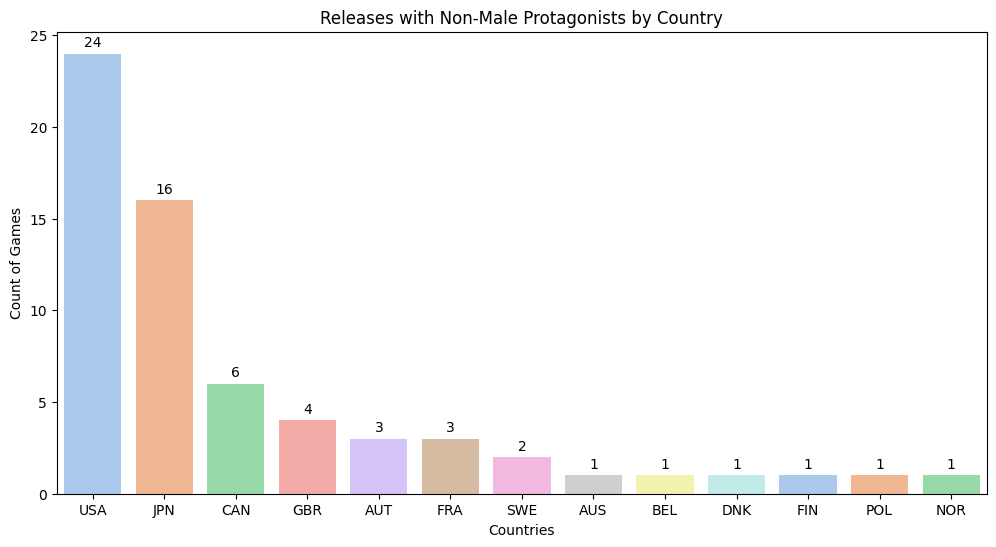

In [32]:
plt.figure(figsize=(12, 6))
plot = sns.barplot(x=country_count.index, y=country_count.values, palette='pastel')
plot
plt.title('Releases with Non-Male Protagonists by Country')
plt.xlabel('Countries')
plt.ylabel('Count of Games')

for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

In [8]:
# Top 3 studios with most releases
df.value_counts("Developer").head(3)

Developer
FromSoftware    4
Naughty Dog     3
Moon Studios    2
Name: count, dtype: int64

C:\Users\zylav\AppData\Local\Temp\ipykernel_5672\3288526869.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')


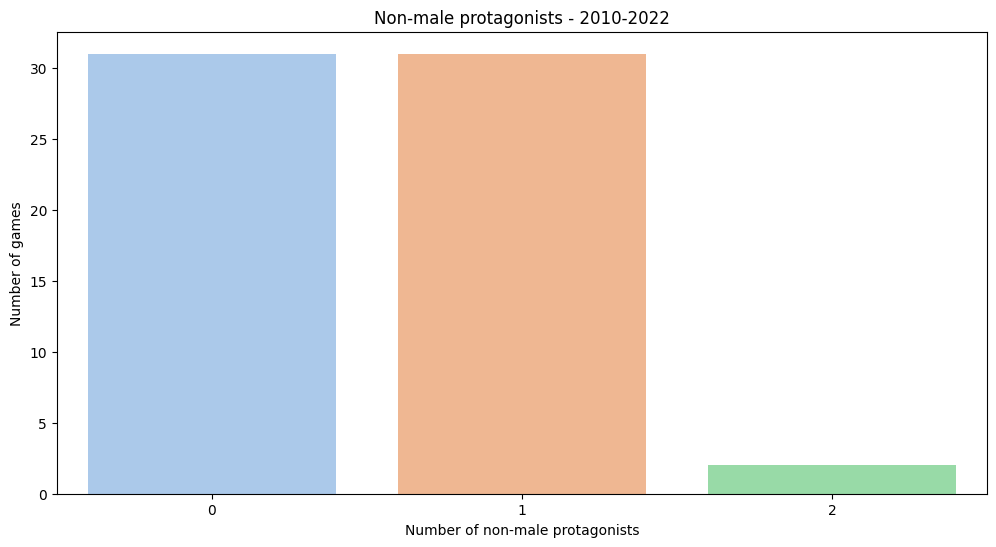

In [36]:
# Even number of games with 0 or 1 female protagonist, whilst there are games with more than 1 male protagonist (up to 4); 2 non-male protagonists is the most and there are only 2 games which feature this. 
gender_counts = df['Protagonist_Non_Male'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')
plt.title('Non-male protagonists - 2010-2022')
plt.xlabel('Number of non-male protagonists')
plt.ylabel('Number of games')
plt.show()


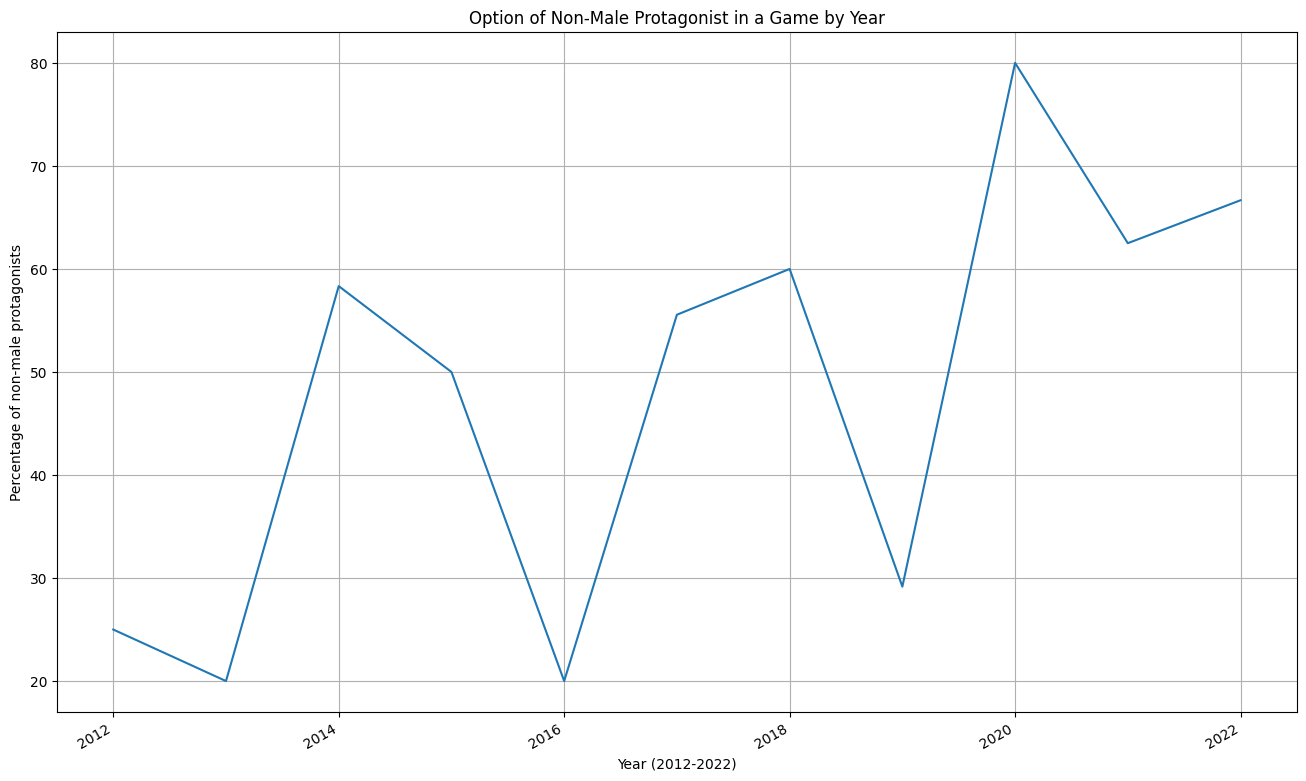

In [35]:
# Steady increase in the number of non-male protagonists over time, to the point where there are now less male protagonists in games than non-male 
df["Percentage_Protagonist_Non_Male"] = df["Protagonist_Non_Male"] / df["Protagonist"] *100

percentage_protagonist_non_male_by_year = df.groupby(df["Release"].dt.year)['Percentage_Protagonist_Non_Male'].mean().to_frame()


plt.figure(figsize=(16, 10))
sns.lineplot(data=percentage_protagonist_non_male_by_year, x='Release', y='Percentage_Protagonist_Non_Male',).get_figure().autofmt_xdate()
plt.title('Option of Non-Male Protagonist in a Game by Year')
plt.xlabel('Year (2012-2022)')
plt.ylabel('Percentage of non-male protagonists')
plt.grid(True)
plt.show()

In [11]:
# Calculate the percentage of all games released that had a non-male protagonist per year
# Highest number of non-male protagonists was in 2020 with 80% of releases having at least one non-male protagonist. Lowest was in 2013 and 2016 respectively.
nondf.groupby(df["Release"].dt.year)['Percentage_Protagonist_Non_Male'].mean().to_frame()

,Percentage_Protagonist_Non_Male
Release,
2012,0.250000
2013,0.200000
2014,0.583333
2015,0.500000
2016,0.200000
2017,0.555556
2018,0.600000
2019,0.291667
2020,0.800000


In [ ]:
# The average, when tallying all games, is for games to have 40% non-male side characters.

In [21]:
# The table below demonstrates the developers with the highest amount of non-male characters in their games
df.groupby("Developer")["Percentage_non_male"].aggregate(['mean', 'count']).sort_values(by='mean', ascending=False).head(5)

,mean,count
Developer,,
Finji,1.000,1
Thatgamecompany,1.000,1
Andrew Shouldice,1.000,1
Moon Studios,0.715,2
Maddy Makes Games,0.670,1


In [13]:
df[df["Developer"] == "Moon Studios"]
# The studio with the most non-male characters (one non-male protagonist for each game and 80% and 63% of all characters being male in their games respectively) - they also had the third highest number of releases as seen earlier.


,Game_Id,Title,Release,Developer,Country,Protagonist,Protagonist_Non_Male,Percentage_non_male,Percentage_Protagonist_Non_Male
45,OABF,Ori and the Blind Forest,2015-03-01,Moon Studios,AUT,1,1,0.80,1.0
39,OAWW,Ori and the Will of the Wisps,2020-03-01,Moon Studios,AUT,1,1,0.63,1.0


In [ ]:
# In contrast, there were 4 developers who produced a game with 0% non-male characters. Out of the 4, 3 were focused on a very small number of characters to begin with (1 character who happens to be male was the commonality), yet the game produced by Treyarch was Call of Duty: Black Ops 2 which featured not a single non-male character and had a larger number of central characters. It'd be interesting to know how many characters they had in their central plot. With a larger dataset, it'd be interesting to see if this is a theme across Call of Duty games.
df.groupby("Developer")["Percentage_non_male"].aggregate(['mean', 'count']).sort_values(by='mean', ascending=False).tail(5)

,mean,count
Developer,,
Ryu Ga Gotoku Studio,0.12,1
Galactic Cafe,0.00,1
D-Pad Studio,0.00,1
Paydead,0.00,1
Treyarch,0.00,1


In [ ]:
# Austria produces the most games with a higher ratio of non-male characters (Moon Studios produced 2 of these).
# Canada produces closest to real life proportions of gender split within their games when given the number of releases.
# Japan and the US produce the most games, yet skew closer to having more male characters (40% of all characters and 37% respectively)
df.groupby("Country")["Percentage_non_male"].aggregate(['mean', 'count']).sort_values(by='mean', ascending=False)

,mean,count
Country,,
AUT,0.700000,3
FIN,0.670000,1
CAN,0.513333,6
AUS,0.500000,1
FRA,0.413333,3
USA,0.400000,24
JPN,0.378750,16
BEL,0.360000,1
SWE,0.350000,2


### By developer, is there a developer who has increased their percentage of non-male characters from 2012-2022?

In [14]:
#df
# Ensure the important columns exist
required_columns = ['Release', 'Developer', 'Protagonist', 'Protagonist_Non_Male']
for column in required_columns:
    if column not in df.columns:
        print(f"Missing column: {column}")
    else: 
        print ("Check :)")

Check :)
Check :)
Check :)
Check :)


In [13]:
# Extract the year from the 'Release' column
df['Year'] = df['Release'].dt.year

In [14]:
# Filter the data for the years between 2012 and 2022
df = df[(df['Year'] >= 2012) & (df['Year'] <= 2022)]

In [15]:
# Pivot the table to get years as columns and developers as rows
pivot_df = df.pivot_table(index='Developer', columns='Year', values='Percentage_Protagonist_Non_Male', aggfunc='mean')

In [16]:
# Calculate the increase in the percentage of non-male protagonists from 2012 to 2022
pivot_df['Increase'] = pivot_df[2022] - pivot_df[2012]

In [17]:
# Filter the developers who have increased their percentage
increased_developers = pivot_df[pivot_df['Increase'] > 0]

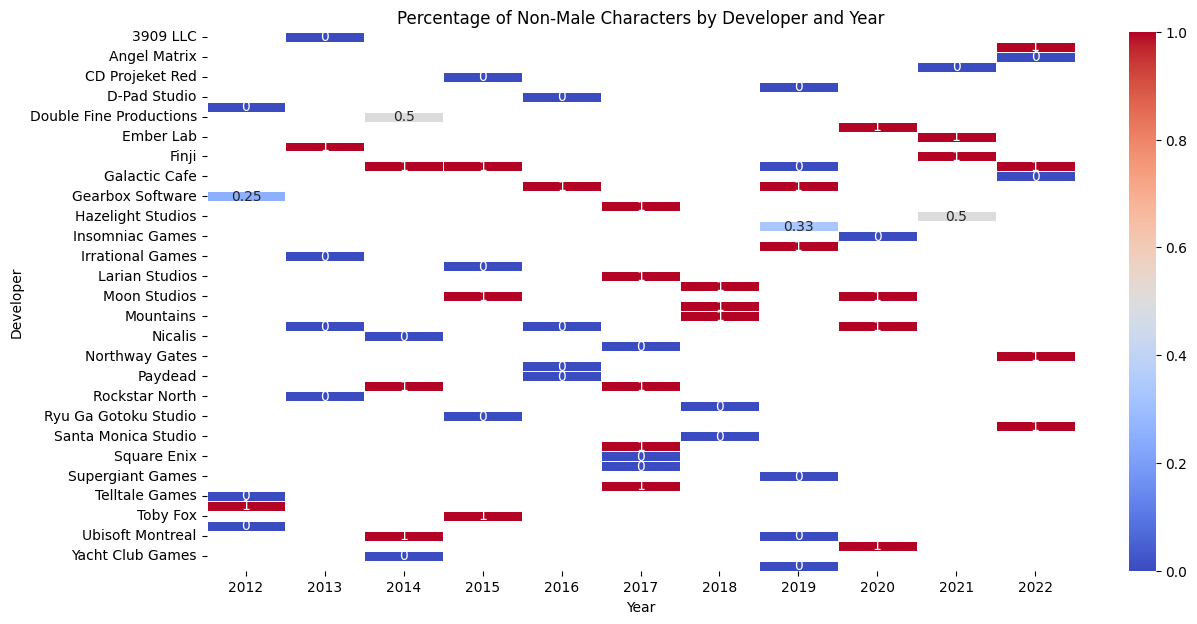

Developers with an increasing trend in non-male characters percentages from 2012 to 2022:


Year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Increase
Developer,,,,,,,,,,,,


In [18]:
# Plot the results
plt.figure(figsize=(14, 7))
sns.heatmap(pivot_df.drop(columns='Increase'), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Percentage of Non-Male Characters by Developer and Year')
plt.xlabel('Year')
plt.ylabel('Developer')
plt.show()

print("Developers with an increasing trend in non-male characters percentages from 2012 to 2022:")
increased_developers

The empty table of developers inscreased: means there isn't a developer increasing their non-male chars as protagonist.


### Summary of Findings:
1. **General Visualization**:
   - The heatmap displays the percentage of non-male protagonists for each developer from 2012 to 2022.
   - Colors indicate values, with red tones representing higher percentages and blue tones representing lower percentages.

2. **Developer Trends**:
   - The `increased_developers` table is empty, meaning no developer has shown a net increase in the percentage of non-male characters from 2012 to 2022.
   - Some developers have high percentages in specific years, but no overall increase over the period.

3. **Specific Data**:
   - Developers like **Gearbox Software** showed a 0.25 percentage in 2012 but did not consistently increase in subsequent years.
   - **Double Fine Productions** and others show variations across years but no net increase from 2012 to 2022.

### Notable Observations:
- **Developers with Scores of 1**:
  - Some developers, such as **Finji** and **Northway Games**, have a score of 1 in certain years, indicating 100% non-male protagonists for those years.
  - These high scores are significant but do not show a consistent increasing trend over the entire period analyzed.

### Heatmap Interpretation:
- **Timeline**: Each row represents a developer, and each column represents a year.
- **Colors and Annotations**: Numbers and colors in cells indicate the percentage of non-male protagonists for that specific year and developer.
- **Empty Years**: Some developers do not have data for certain years, shown as empty cells.

### Conclusion:
From the data and analysis:
- No developers have shown a consistent increase in the percentage of non-male characters from 2012 to 2022.
- The heatmap provides a clear view of variations in non-male character percentages but does not indicate a net increasing trend.

### Recommendations for Future Analysis:
- **Expand Data**: Include more games and developers for a broader analysis.
- **Game-Level Trends**: Analyze trends at the individual game level in addition to developer aggregates.
- **Contextual Analysis**: Investigate significant changes in development studios or policies influencing non-male character representation.

This analysis offers a foundational understanding of trends in non-male character representation in video games over the past decade.

In [23]:
# Releases per year by developer
plt.figure(figsize=(20, 15))
sns.barplot(df, x="Developer", y="Release", hue="Developer", legend=True, width=0.4).get_figure().autofmt_xdate()
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Releases per year by developer')
plt.show()